# Plot magic and entanglement

## Entanglement

In [1]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, random_clifford, Pauli, Operator, partial_trace, entropy
import numpy as np
from quantum_simulation_recipe.spin import Nearest_Neighbour_1d
from quantum_simulation_recipe.trotter import *
from quantum_simulation_recipe.bounds import norm, tight_bound, commutator
from quantum_simulation_recipe.plot_config import *

def partEntropy(states, m):
    entro = []
    for i, state in enumerate(states):
        st = partial_trace(state, list(range(m)))
        entro.append(entropy(st, 2))
    return entro

depth = 40

# Load data for both plots
# Atypical data
s_anti = np.load("./vardata/antientstates.npy")
states_anti = []
for i, st in enumerate(s_anti):
    state = Statevector(st)
    states_anti.append(state)

moments_anti = []
for j, st0 in enumerate(states_anti):
    errors = np.load(f"./vardata/antient_{j}.npy")
    av = np.average(errors)
    errors = errors - av
    moments_anti.append(np.average(np.power(errors, 2)))

# Typical data
s_ent = np.load("./vardata/entstates.npy")
states_ent = []
for i, st in enumerate(s_ent):
    state = Statevector(st)
    states_ent.append(state)

moments_ent = []
for j, st0 in enumerate(states_ent):
    errors = np.load(f"./vardata/ent_{j}.npy")
    av = np.average(errors)
    errors = errors - av
    moments_ent.append(np.average(np.power(errors, 2)))

# Plot settings
fontprops = {'size': 38}
ls = 38
ws = 38
# plt.rc('text', usetex=True)
# plt.rc('font', family='sans-serif')
mpl.rcParams['font.family'] = ['Helvetica', 'sans-serif']

set_fontsize(linewidth=3)

# plt.rcParams["font.family"] = ["Times New Roman"]
colors = ['#E4A031', '#D68438', '#C76B60', '#B55384', '#7C4D77', '#474769', 
          '#B2B6C1', '#73A5A2', '#4C7780', '#F6E2C1', '#F3DBC1', '#D6E2E2', 
          '#F0EFED', '#E3BBED', '#26445E']
x = list(range(depth + 1))


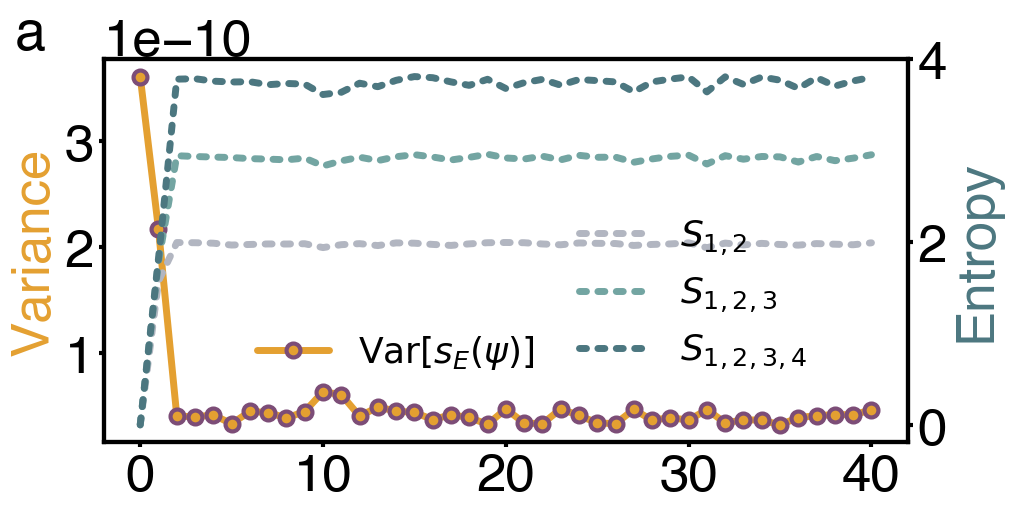

In [7]:
# Create figure with two subplots side by side
fig, ax1_right = plt.subplots(figsize=(10, 5), layout='constrained',sharex=True)

# # ========== LEFT PLOT: ATYPICAL ==========
# ax1_left.set_xlabel(r"Time $t$", fontdict=fontprops)
# ax1_left.set_ylabel(r"Variance", fontdict=fontprops, color=colors[0])
# ax1_left.plot(x, moments_anti, label=rf'$\text{{Var}}[s_E(\psi)]$', color=colors[0], 
#               marker="o", markerfacecolor=colors[0], markeredgecolor=colors[4], 
#               markersize=10, linestyle="-", markeredgewidth=3, linewidth=5)
# ax1_left.ticklabel_format(style='sci', axis='y', scilimits=(-2, 2))
# ax1_left.tick_params(axis='y', labelsize=ls, which='both')
# ax1_left.tick_params(axis='x', labelsize=ls)
# offset_text_left = ax1_left.yaxis.get_offset_text()
# offset_text_left.set_fontsize(ls)
# # ax1_left.set_title(r"(a) Atypical", fontdict=fontprops, pad=20)

# ax2_left = ax1_left.twinx()
# ax2_left.set_ylabel(r"Entropy", fontdict=fontprops, color=colors[8])
# part = [2, 3, 4]
# labels = [rf'$S_{{1,2}}$', rf'$S_{{1,2,3}}$', rf'$S_{{1,2,3,4}}$']
# for j, m in enumerate(part):
#     y = np.load(f"./vardata/part{m}atypical.npy")
#     ax2_left.plot(x, y, label=labels[j], color=colors[m+4], 
#                   linestyle="dotted", linewidth=5)
# ax2_left.tick_params(axis='y', which='major', labelsize=ls)

# ========== RIGHT PLOT: TYPICAL ==========
#ax1_right.set_xlabel(r"Time $t$", fontdict=fontprops)
ax1_right.set_ylabel(r"Variance", fontdict=fontprops, color=colors[0])
ax1_right.plot(x, moments_ent, label=rf'$\text{{Var}}[s_E(\psi)]$', color=colors[0], 
               marker="o", markerfacecolor=colors[0], markeredgecolor=colors[4], 
               markersize=10, linestyle="-", markeredgewidth=3, linewidth=5)
ax1_right.ticklabel_format(style='sci', axis='y', scilimits=(-2, 2))
ax1_right.tick_params(axis='y', labelsize=ls, which='both')
ax1_right.tick_params(axis='x', labelsize=ls)
offset_text_right = ax1_right.yaxis.get_offset_text()
offset_text_right.set_fontsize(ls)
# ax1_right.set_title(r"(b) Typical", fontdict=fontprops, pad=20)

ax2_right = ax1_right.twinx()
# move the ylabel to the top of the axis
ax2_right.set_ylabel(r"Entropy", fontdict=fontprops, color=colors[8])
# ax2_right.set_ylabel(r"Entropy", fontdict=fontprops, color=colors[8], rotation=0, ha='left', va='bottom')
# ax2_right.yaxis.set_label_coords(0.75, 1.02) 
# ax2_left.set_ylabel(r"Entropy", fontdict=fontprops, color=colors[8], rotation=0, ha='left', va='bottom')
# ax2_left.yaxis.set_label_coords(0.75, 1.02) 
for j, m in enumerate([2,3,4]):
    y = np.load(f"./vardata/part{m}typical.npy")
    ax2_right.plot(x, y, label=labels[j], color=colors[m+4], 
                   linestyle="dotted", linewidth=5)
ax2_right.tick_params(axis='y', which='major', labelsize=ls)

# Optional: Add a shared legend
# lines1, labels1 = ax1_left.get_legend_handles_labels()
# lines2, labels2 = ax2_left.get_legend_handles_labels()
# fig.legend(lines1 + lines2, labels1 + labels2, loc='upper center', 
#            bbox_to_anchor=(0.3, 0.56), fontsize=22)
ax1_right.legend(loc='lower left', bbox_to_anchor=(0.15, 0.10), fontsize=26, framealpha=0)
ax2_right.legend(loc='lower left', bbox_to_anchor=(0.55, 0.10), fontsize=26, framealpha=0)
# fig.legend(lines1 + lines2, labels1 + labels2, loc='upper center', 
#            bbox_to_anchor=(0.5, 1.02), ncol=4, fontsize=24)

for ax, label in zip([ax1_right, ax1_left], ['a', 'b']): 
    ax.text(-0.11, 1.13, label, transform=ax.transAxes, fontsize=40, va='top', weight='bold')

plt.savefig('atypvar.pdf', bbox_inches='tight', dpi=200, pad_inches=0.1, transparent=True)

0.02846002612293351
0.028458797166971434
0.02846119939607558
0.028460481004651893
0.028461331082511837
0.028460455050936282
0.028461677267004975
0.028455969627723496
0.028463839822922613
0.028461968347685707


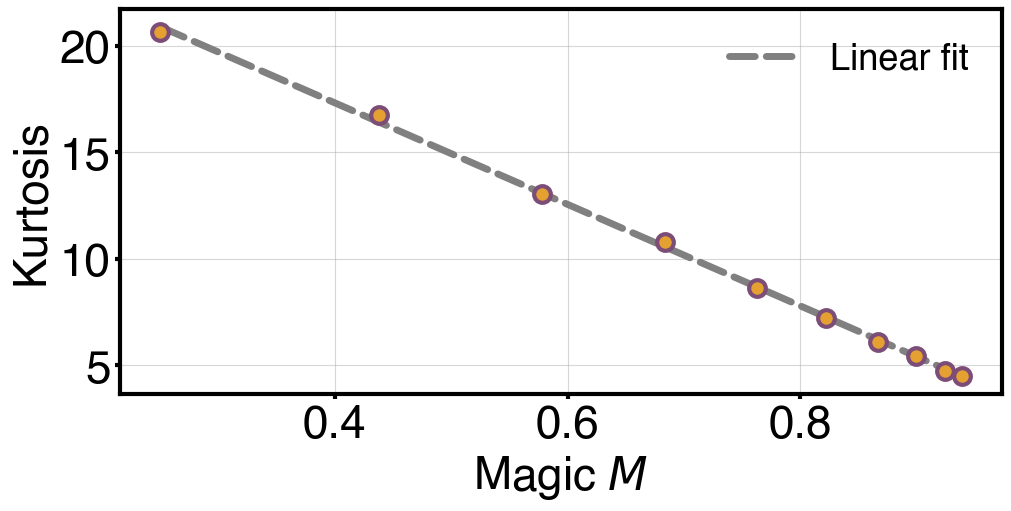

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, ConnectionPatch
from scipy.interpolate import make_interp_spline

# plt.rc('text', usetex=True)
# plt.rc('font', family='serif')
# plt.rcParams["font.family"] = ["Times New Roman"]
ls = 33
fontprops = {'size': 33}
colors = ['#1E4C9C', '#F58383', '#0D8B43', '#ECAC27', '#7B92C7', '#FB8C62', '#B0DC66', '#8C9FCA', '#C9C780', '#66C1A4', '#FCB2AF', '#9BDFDF', '#FFE2CE', '#C4D8E9', '#BEBCDF', '#4C9BE6', '#B2B6C1', '#4C7780', '#73A5A2', '#F6E2C1', '#F3DBC1', '#D6E2E2', '#F0EFED', '#E3BBED', '#26445E']


# Load data for distributions plot
magics_dist = np.load("./data/differentmagic.npy")

# Load data for kurtosis plot (different file!)
magics_kurt = np.load("./data/differentmagics_right.npy")

# Calculate moments for kurtosis plot - EXACTLY as in kurtosis.py
average = []
moments = []
for j, mag in enumerate(magics_kurt):
    errors = np.load(f"./data/magic_10bit{j+1}.npy")
    av = np.average(errors)
    print(av)
    average.append(av)
    errors = errors - av
    var = np.average(np.power(errors, 2))
    moments.append(np.average(np.power(errors, 4)) / np.power(var, 2))

# Create figure with two subplots side by side
fig, ax_right= plt.subplots(figsize=(10,5), layout='constrained')

# # ========== LEFT PLOT: DISTRIBUTIONS ==========
# ax_left.set_xlabel(r"Trotter error", fontdict=fontprops)
# ax_left.set_ylabel(r"Density", fontdict=fontprops)

# i = 0
# for j, m in enumerate(magics_dist):
#     if j != 3 and j != 5 and j != 6 and j != 7 and j != 8:
#         i = i + 1
#         errors = np.load(f"./data/magic_10bit{j+1}.npy")
#         hists, bins = np.histogram(errors, 1000,density=True)
#         ax_left.plot(bins[:-1], np.power(hists, 1), label=rf"$M_{i}:$""{:.2f}".format(magics_dist[j]), linewidth=4, color=colors[j])

# ax_left.legend(fontsize=24, bbox_to_anchor=(0.21, 0.1, 0.23, 0.2), framealpha=1)
# ax_left.ticklabel_format(style='sci', scilimits=(-2, 2), axis='y')
# offset_text_left = ax_left.yaxis.get_offset_text()
# offset_text_left.set_fontsize(ls)
# ax_left.tick_params(axis='both', labelsize=ls)
# ax_left.grid(alpha=0.3)

# # Add inset for zoomed region
# zoom_x_min, zoom_x_max = 0.030, 0.0315
# zoom_y_min, zoom_y_max = 0, 300
# ax_inset = ax_left.inset_axes([0.65, 0.3, 0.33, 0.5])

# i = 1
# for j, m in enumerate(magics_dist):
#     if j != 3 and j != 5 and j != 6 and j != 7 and j != 8:
#         errors = np.load(f"./data/magic_10bit{j+1}.npy")
#         hists, bins = np.histogram(errors, 1000, density=True)
#         ax_inset.plot(bins[:-1], np.power(hists, 1), label=rf'$M_{i}$={round(magics_dist[j], 3)}', linewidth=3, color=colors[j])
#         ax_inset.set_xlim(zoom_x_min, zoom_x_max)
#         ax_inset.set_ylim(zoom_y_min, zoom_y_max)
# ax_inset.tick_params(axis='both', labelsize=18)

# # Mark zoomed region on main plot
# rect = Rectangle(
#     (zoom_x_min, zoom_y_min),
#     zoom_x_max - zoom_x_min,
#     zoom_y_max - zoom_y_min,
#     linewidth=1,
#     edgecolor='black',
#     facecolor='none',
#     linestyle='--',
#     alpha=0.7
# )
# ax_left.add_patch(rect)

# # Connection lines
# al = 0.5
# con1 = ConnectionPatch(xyA=(zoom_x_min, zoom_y_min), xyB=(zoom_x_min, zoom_y_min), 
#                        coordsA="data", coordsB="data", axesA=ax_left, axesB=ax_inset,
#                        color="black", linestyle="--", alpha=al, linewidth=1)
# con2 = ConnectionPatch(xyA=(zoom_x_max, zoom_y_min), xyB=(zoom_x_max, zoom_y_min),
#                        coordsA="data", coordsB="data", axesA=ax_left, axesB=ax_inset,
#                        color="black", linestyle="--", alpha=al, linewidth=1)
# con3 = ConnectionPatch(xyA=(zoom_x_min, zoom_y_max), xyB=(zoom_x_min, zoom_y_max),
#                        coordsA="data", coordsB="data", axesA=ax_left, axesB=ax_inset,
#                        color="black", linestyle="--", alpha=al, linewidth=1)
# con4 = ConnectionPatch(xyA=(zoom_x_max, zoom_y_max), xyB=(zoom_x_max, zoom_y_max),
#                        coordsA="data", coordsB="data", axesA=ax_left, axesB=ax_inset,
#                        color="black", linestyle="--", alpha=al, linewidth=1)

# ax_left.add_artist(con1)
# ax_left.add_artist(con2)
# ax_left.add_artist(con3)
# ax_left.add_artist(con4)

# ========== RIGHT PLOT: KURTOSIS ==========
colors_right = ['#E4A031', '#D68438', '#C76B60', '#B55384', '#7C4D77', '#474769', '#B2B6C1', '#4C7780', '#73A5A2', '#F6E2C1', '#F3DBC1', '#D6E2E2', '#F0EFED', '#E3BBED', '#26445E']

# Fit and plot - EXACTLY as in kurtosis.py
z1 = np.polyfit(magics_kurt, moments, 1)
p1 = np.poly1d(z1)
moments_pre = p1(magics_kurt)
ax_right.plot(magics_kurt, moments_pre, "--", color='gray', linewidth=5, label='Linear fit')
ax_right.legend(loc='best', fontsize=26, framealpha=0)

ax_right.set_xlabel(r"Magic $M$", fontdict=fontprops)
ax_right.set_ylabel(r"Kurtosis", fontdict=fontprops)
ax_right.tick_params(axis='both', labelsize=ls)
ax_right.grid(True, alpha=0.5)

# Plot points - EXACTLY as in kurtosis.py
ax_right.plot(magics_kurt, moments, "o", markerfacecolor=colors_right[0], 
              markeredgecolor=colors_right[4], markersize=12, markeredgewidth=3)

# # Add labels (a) and (b)
# for ax, label in zip([ax_left, ax_right], ['a', 'b']):
#     ax.text(-0.11, 1.1, label, transform=ax.transAxes, fontsize=40, va='top', weight='bold')

plt.savefig('./final_figures/kurtosis.pdf', bbox_inches='tight', pad_inches=0.1,dpi=200,transparent=True)

Finished!


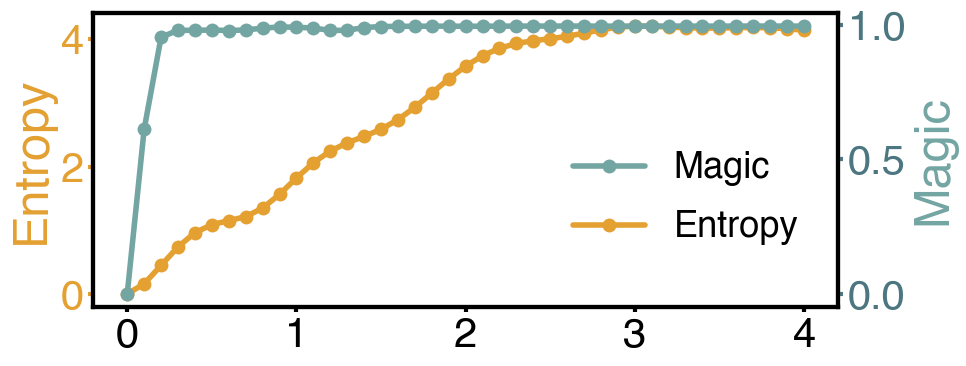

In [16]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, random_clifford, Pauli, Operator, partial_trace, entropy
import numpy as np
from quantum_simulation_recipe.spin import Nearest_Neighbour_1d
from quantum_simulation_recipe.trotter import *
from quantum_simulation_recipe.bounds import norm, tight_bound, commutator
from quantum_simulation_recipe.plot_config import *

def partEntropy(state, m):
    st = partial_trace(state, list(range(m)))
    return entropy(st,2)

colors = ['#E4A031', '#D68438', '#C76B60', '#B55384', '#7C4D77', '#474769', 
          '#B2B6C1', '#73A5A2', '#4C7780', '#F6E2C1', '#F3DBC1', '#D6E2E2', 
          '#F0EFED', '#E3BBED', '#26445E']

n=10
times=np.linspace(0,4,41)
mas=np.load("./mag_time_data/Tymagics.npy")
amas=np.load("./mag_time_data/Atymagics.npy")
magics=[]
amagics=[]
i=0
while i<41:
    magics.append(mas[i])
    amagics.append(amas[i])
    i+=1
entropies=np.load("./mag_time_data/Tyentropies.npy")
aentropies=np.load("./mag_time_data/Atyentropies.npy")
fontprops = {'size': 35} #axis
ls=26 #legend size
ts=30 #tick size
ms=10 #marks size
mes=0 #marks edge size
lw=4  #linewidth

#=======Create two subplots========
fig, ax_up = plt.subplots(figsize=(10,4),sharex=True)

#=========typical case===============
e=0
#ax_up.set_xlabel(r"Time $t$",fontdict=fontprops)
ax_up.set_ylabel(r"Entropy", fontdict=fontprops, color=colors[e])
ax_up.plot(times,entropies,label="Entropy",color=colors[e], marker="o", markerfacecolor=colors[e], markeredgecolor=colors[5], markersize=ms, linestyle="-", markeredgewidth=mes, linewidth=lw)
ax_up.ticklabel_format(style='sci', axis='y', scilimits=(-2, 2))
ax_up.tick_params(axis='y', labelsize=ts, colors=colors[e])
ax_up.tick_params(axis='x', labelsize=ts)

ax2=ax_up.twinx()
m=7
ax2.set_ylabel(r"Magic", fontdict=fontprops, color=colors[m])
ax2.tick_params(axis='y', labelsize=ts,colors=colors[m+1])
ax2.plot(times,magics,label="Magic",color=colors[m], marker="o", markerfacecolor=colors[m], markeredgecolor=colors[m+1], markersize=ms, linestyle="-", markeredgewidth=mes, linewidth=lw)

ax_up.legend(loc='lower left', bbox_to_anchor=(0.6, 0.10), fontsize=ls, framealpha=0)
ax2.legend(loc='lower left', bbox_to_anchor=(0.6, 0.30), fontsize=ls, framealpha=0)
#ax_up.set_title(r"(b) Typical", fontsize=ls, pad=20)

#=======Atypical case========
# e=0
# ax_down.set_xlabel(r"Time $t$",fontdict=fontprops)
# ax_down.set_ylabel(r"Entropy", fontdict=fontprops, color=colors[e])
# ax_down.plot(times,aentropies,label="Entropy",color=colors[e], marker="o", markerfacecolor=colors[e], markeredgecolor=colors[5], markersize=ms, linestyle="-", markeredgewidth=mes, linewidth=lw)
# ax_down.ticklabel_format(style='sci', axis='y', scilimits=(-2, 2))
# ax_down.tick_params(axis='y', labelsize=ts, colors=colors[e])
# ax_down.tick_params(axis='x', labelsize=ts)

# ax4=ax_down.twinx()
# m=7
# ax4.set_ylabel(r"Magic", fontdict=fontprops, color=colors[m])
# ax4.tick_params(axis='y', labelsize=ts,colors=colors[m+1])
# ax4.plot(times,amagics,label="Magic",color=colors[m], marker="o", markerfacecolor=colors[m], markeredgecolor=colors[m+1], markersize=ms, linestyle="-", markeredgewidth=mes, linewidth=lw)

# ax_down.legend(loc='lower left', bbox_to_anchor=(0.6, 0.10), fontsize=ls, framealpha=0)
# ax4.legend(loc='lower left', bbox_to_anchor=(0.6, 0.30), fontsize=ls, framealpha=0)

# # Add labels (a) and (b)
# # for ax, label in zip([ax_up, ax_down], ['a', 'b']):
# #     ax.text(-0.11, 1, label, transform=ax.transAxes, fontsize=35, va='top', weight='bold')

plt.savefig('./final_figures/tyincrease.pdf', 
            bbox_inches='tight',  # 紧贴内容
            pad_inches=0.1,         # 无额外填充
            dpi=1200000,              # 高分辨率
            transparent=True)     # 透明背景
print("Finished!")